# Exploratory Data Analysis

## Load the datasets

1) Unify train dataset with test dataset

2) Shuffle it

3) Explore it

In [2]:
import pandas as pd

corpus_train = pd.read_excel('~/TFM_fake_news_detector/data/Corpus_spanish_train.xlsx', index_col = 0)
corpus_test = pd.read_excel('~/TFM_fake_news_detector/data/Corpus_spanish_test.xlsx', index_col = 0)

corpus = pd.concat([corpus_train, corpus_test])

corpus = corpus.sample(frac = 1)

In [3]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 33 to 144
Data columns (total 6 columns):
Category    971 non-null object
Topic       971 non-null object
Source      971 non-null object
Headline    971 non-null object
Text        971 non-null object
Link        971 non-null object
dtypes: object(6)
memory usage: 53.1+ KB


In [4]:
corpus.head()

,Category,Topic,Source,Headline,Text,Link
Id,,,,,,
33,True,Society,Proceso,Nuevo arzobispo de Antequera-Oaxaca llega a un...,Nuevo arzobispo de Antequera-Oaxaca llega a un...,https://www.proceso.com.mx/522312/nuevo-arzobi...
384,True,Politics,Animal Político,Enrique Ochoa dejó este miércoles la dirigenci...,Enrique Ochoa dejó este miércoles la dirigenci...,https://www.animalpolitico.com/2018/05/pri-enr...
627,True,Entertainment,HOLA,Paulina Peña habla por primera vez del legado ...,Paulina Peña habla por primera vez del legado ...,https://www.quien.com/politica/2018/01/25/paul...
224,Fake,Health,ABC sociedad,La Unión Europea podría prohibir los kebabs po...,La Unión Europea podría prohibir los kebabs po...,http://www.abc.es/sociedad/abci-union-europea-...
448,Fake,Politics,El Ruinaversal,"INE AUTORIZA EL ""SUFRAGIO VIP"": EL VOTO DE EMP...","INE AUTORIZA EL ""SUFRAGIO VIP"": EL VOTO DE EMP...",http://www.elruinaversal.com/2018/06/19/ine-au...


In [5]:
labels = corpus['Category']

## Modelling

### CountVectorizer

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

Create an instance of the CountVectorizer class.
Call the fit() function in order to learn a vocabulary from one or more documents.
Call the transform() function on one or more documents as needed to encode each as a vector.
An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.

### Passive Aggressive Classifier

Passive Aggressive are considered algorithms for online learning. Their characteristic is that they remain passive when dealing with an outcome which has been correctly classified, and become aggressive when a miscalculation takes place, thus constantly self-updating and adjusting.

In [5]:
import nltk

In [6]:
import itertools
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
from nltk.corpus import stopwords  
from nltk import word_tokenize  
from nltk.data import load  
from nltk.stem import SnowballStemmer  
from string import punctuation

In [32]:
#Stopword list to use
spanish_stopwords = stopwords.words('spanish')

In [33]:
#Spanish stemmer: Stemming is the process to transform any word into its rooting word, considering them as the same word
stemmer = SnowballStemmer('spanish')

def stem_tokens(tokens, stemmer):  
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

In [34]:
#Punctuation to remove
non_words = list(punctuation)

#Adding spanish punctuation
non_words.extend(['¿', '¡'])  
non_words.extend(map(str,range(10)))

In [35]:
def tokenize(text):  
    #Remove punctuation
    text = ''.join([c for c in text if c not in non_words])
    #Tokenize
    tokens =  word_tokenize(text)

    #Stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems

In [36]:
vectorizer = CountVectorizer(  
                analyzer = 'word',
                tokenizer = tokenize,
                lowercase = True,
                stop_words = spanish_stopwords)

#### Split into training and test sets

In [37]:
x_train,x_test,y_train,y_test = train_test_split(corpus['Text'], labels, test_size=0.3, random_state=7)

In [38]:
c_train = vectorizer.fit_transform(x_train.values)
c_test = vectorizer.transform(x_test.values)

print(c_train)

/home/pipe11/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien', 'tod', 'tuv', 'tuy', 'vosotr', 'vuestr'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


  (0, 638)	3
  (0, 10357)	3
  (0, 5784)	5
  (0, 10583)	2
  (0, 6177)	2
  (0, 12330)	2
  (0, 8640)	3
  (0, 11375)	2
  (0, 8864)	2
  (0, 9448)	1
  (0, 3185)	1
  (0, 7671)	2
  (0, 949)	2
  (0, 12236)	1
  (0, 10838)	1
  (0, 7331)	1
  (0, 5854)	1
  (0, 12198)	1
  (0, 11748)	1
  (0, 9754)	2
  (0, 9868)	1
  (0, 5403)	1
  (0, 6714)	1
  (0, 4519)	1
  (0, 8714)	3
  :	:
  (678, 9)	1
  (678, 4680)	1
  (678, 4673)	1
  (678, 6786)	1
  (678, 7389)	1
  (678, 12270)	4
  (678, 1736)	1
  (678, 2558)	1
  (678, 2831)	1
  (678, 8451)	1
  (678, 2551)	1
  (678, 1576)	1
  (678, 5294)	1
  (678, 2339)	4
  (678, 7881)	1
  (678, 4461)	1
  (678, 4395)	1
  (678, 7135)	1
  (678, 9282)	1
  (678, 10975)	1
  (678, 7164)	1
  (678, 6378)	1
  (678, 3249)	1
  (678, 7241)	1
  (678, 11995)	1


In [39]:
c_train.shape

(679, 12722)

In [40]:
c_test.shape

(292, 12722)

Initializes the Passive Aggressive Classifier

In [41]:
pa_classifier_1 = PassiveAggressiveClassifier(max_iter=50)
pa_classifier_1.fit(c_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [42]:
y_pred = pa_classifier_1.predict(c_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 82.19%


In [43]:
cf_matrix = confusion_matrix(y_test,y_pred, labels=['Fake','True'])
print(cf_matrix)

[[117  21]
 [ 31 123]]


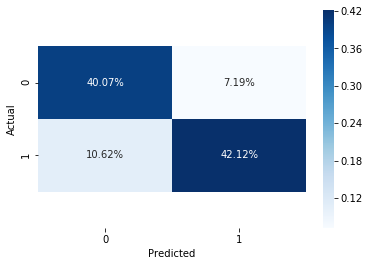

In [48]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## TfidfVectorizer

The TfidfVectorizer serves us to convert a collection of raw documents into a matrix of TF and IDF features.

### IDF (Inverse Document Frequency)

The IDF is used to calculate how many times a word appears on a set of documents.

### TF (Term Frequency)

The TF, unlike the IDF is the number of times a word appears in a single document.

### Declare a TfidfVectorizer with stop words from English and we will allow up to a document frequency of 0.8
### Then fit and transform it to the dataset

In [50]:
tfidf_vectorizer = TfidfVectorizer(  
                analyzer = 'word',
                tokenizer = tokenize,
                lowercase = True,
                stop_words = spanish_stopwords)

In [51]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

/home/pipe11/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien', 'tod', 'tuv', 'tuy', 'vosotr', 'vuestr'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [52]:
print(tfidf_train)

  (0, 4867)	0.09487438349796473
  (0, 5630)	0.057739186792188146
  (0, 6241)	0.04957953305978498
  (0, 2813)	0.08611044358121214
  (0, 10791)	0.046507676406413616
  (0, 12155)	0.11036081137508882
  (0, 3892)	0.04804360473309929
  (0, 5968)	0.06906660455827178
  (0, 10095)	0.12254301205383092
  (0, 3076)	0.05177681821945501
  (0, 6264)	0.07893367885028936
  (0, 3025)	0.10273951383037691
  (0, 8925)	0.09091465903678546
  (0, 4555)	0.05533850895111285
  (0, 5304)	0.08281374063337585
  (0, 3266)	0.056849541721771375
  (0, 11645)	0.03141453448393453
  (0, 4788)	0.10439844280235569
  (0, 8221)	0.06560431712460034
  (0, 3036)	0.04179848214451279
  (0, 3682)	0.09003258770951912
  (0, 8510)	0.07069938141586504
  (0, 7805)	0.04704325008112484
  (0, 9666)	0.041464191866718486
  (0, 4027)	0.08106124243745358
  :	:
  (678, 11485)	0.024027395343672545
  (678, 1411)	0.09520012623728791
  (678, 11699)	0.059009545326152976
  (678, 5099)	0.03200847315189939
  (678, 2495)	0.07342689622324157
  (678, 3245

In [53]:
print(tfidf_test)

  (0, 12511)	0.06745822073680367
  (0, 12282)	0.12381950242234124
  (0, 12236)	0.03983004080300405
  (0, 12087)	0.04020701049012902
  (0, 11849)	0.05109923819379035
  (0, 11775)	0.04332217154786006
  (0, 11722)	0.14050302965857114
  (0, 11265)	0.07660809780900758
  (0, 11208)	0.058358211490182776
  (0, 10788)	0.11253899843237036
  (0, 10685)	0.10507423024219628
  (0, 10499)	0.057068974511337744
  (0, 10268)	0.04182218368987935
  (0, 10164)	0.07509229152911845
  (0, 9947)	0.08022372161491341
  (0, 9648)	0.06190532821458576
  (0, 9616)	0.0528277367802495
  (0, 9406)	0.03062191728170029
  (0, 9404)	0.08860694726645606
  (0, 9265)	0.08827483184706628
  (0, 9214)	0.03575334736749525
  (0, 9207)	0.1737465124556233
  (0, 9191)	0.034673827156771315
  (0, 8760)	0.02465835160687084
  (0, 8714)	0.03315282918705868
  :	:
  (291, 5733)	0.08788685526948231
  (291, 5578)	0.05549957703731301
  (291, 5543)	0.03911245375189887
  (291, 5111)	0.07629402108623282
  (291, 4810)	0.17577371053896462
  (291, 4

Initializes the Passive Aggressive Classifier

In [54]:
pa_classifier_2 = PassiveAggressiveClassifier(max_iter=50)
pa_classifier_2.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

## Predictions & results

In [55]:
y_pred_2 = pa_classifier_2.predict(tfidf_test)
score = accuracy_score(y_test,y_pred_2)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 78.42%


In [58]:
cf_matrix = confusion_matrix(y_test,y_pred_2, labels = ['Fake','True'])
print(cf_matrix)

[[109  29]
 [ 34 120]]


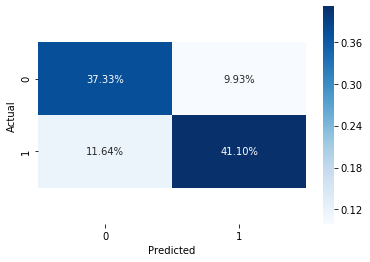

In [59]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()